# Face Recognition

Face recognition problems commonly fall into two categories:

Face Verification - "is this the claimed person?". 
Face Recognition - "who is this person?".
In this notebook I will do Face Verification task. This is a 1:1 matching problem.

Recently, deep learning convolutional neural networks have surpassed classical methods and are achieving state-of-the-art results on standard face recognition datasets.

FaceNet, VGGFace are common pretrained models to use.

Since training requires a lot of data and a lot of computation, we won't train it from scratch here. Instead, we load a previously trained model VGGFace [documentation](https://github.com/rcmalli/keras-vggface)

In [ ]:
#!pip install mtcnn

In [ ]:
#!pip install keras_vggface keras_applications

In [ ]:
# Load packages
from mtcnn.mtcnn import MTCNN
import cv2
import numpy as np
from keras_vggface.utils import preprocess_input
from keras_vggface.vggface import VGGFace
from scipy.spatial.distance import cosine

import warnings
warnings.filterwarnings('ignore', category = FutureWarning)

In this notebook, I used [5 Celebrity Faces Dataset from kaggle](https://www.kaggle.com/dansbecker/5-celebrity-faces-dataset)

In [ ]:
#Get some image
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/fintech/Face_Recognition/5celebrities/data/train/jerry_seinfeld/httpimgthedrumcomsfspublicnewstmpjerryseinfeldjpg.jpg')

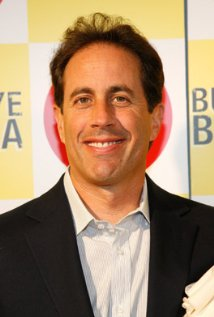

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [ ]:
#create an MTCNN face detector class and use it to detect all faces in the loaded photograph.
detector = MTCNN()

faces = detector.detect_faces(image)
for face in faces:
    print(face)

{'box': [57, 58, 86, 110], 'confidence': 0.999868631362915, 'keypoints': {'left_eye': (82, 100), 'right_eye': (121, 100), 'nose': (101, 121), 'mouth_left': (82, 141), 'mouth_right': (121, 142)}}


In [ ]:
#Create bounding box as follows

def create_bbox(image):
  faces = detector.detect_faces(image)
  bounding_box = faces[0]['box']

  cv2.rectangle(image,
              (bounding_box[0], bounding_box[1]),
              (bounding_box[0]+bounding_box[2], bounding_box[1] + bounding_box[3]),
              (0,155,255),
              2)

  return image

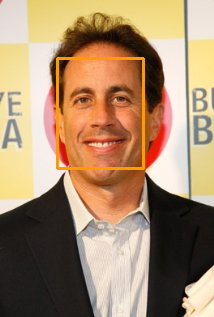

In [ ]:
cv2_imshow(create_bbox(image))

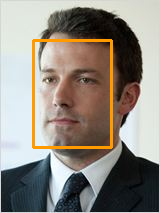

In [ ]:
marked_image = create_bbox(cv2.imread('/content/drive/MyDrive/Colab Notebooks/fintech/Face_Recognition/5celebrities/data/train/ben_afflek/httptrwebimgacstanetcxbdddmediasnmediajpg.jpg'))

cv2_imshow(marked_image)

In [ ]:
#extract the face using boundary

def extract_face(image, resize=(224, 224)):

  image = cv2.imread(image)

  faces = detector.detect_faces(image)
  x1, y1, width, height = faces[0]['box']
  x2, y2 = x1 + width, y1 + height

  face_boundary = image[y1:y2, x1:x2]

  face_image = cv2.resize(face_boundary, resize)

  return face_image

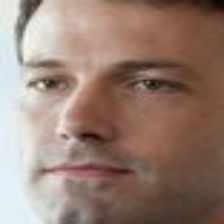

In [ ]:
face_image = extract_face('/content/drive/MyDrive/Colab Notebooks/fintech/Face_Recognition/5celebrities/data/train/ben_afflek/httptrwebimgacstanetcxbdddmediasnmediajpg.jpg')
cv2_imshow(face_image)

A face embedding is a vector that represents the features extracted from the face. This can then be compared with the vectors generated for other faces. For example, another vector that is close (by some measure) may be the same person, whereas another vector that is far (by some measure) may be a different person.


In [ ]:

def get_embeddings(faces):

  face = np.asarray(faces, 'float32')

  face = preprocess_input(face, version = 2)

  model = VGGFace(model = 'resnet50', include_top = False, input_shape = (224, 224, 3), pooling = 'avg')

  return model.predict(face)

In [ ]:
def verify(faces):
  """
  the function checks if the person on two different pictures is the same one

  """

  embeddings = get_embeddings(faces)

  score = cosine (embeddings[0], embeddings[1])

  if score <= 0.7: #or use 0.5
    return 'Face Matched', score

  return 'Face Not Matched', score

Now we will compare two faces (one image is taken from train set, the other one from the validation set)

In [ ]:
faces = [extract_face(image) for image in ['/content/drive/MyDrive/Colab Notebooks/fintech/Face_Recognition/5celebrities/data/train/madonna/httpmediavoguecomrwblondesdarkbrowsmadonnajpg.jpg', '/content/drive/MyDrive/Colab Notebooks/fintech/Face_Recognition/5celebrities/data/val/madonna/httpcdncdnjustjaredcomwpcontentuploadsheadlinesmadonnatalksparisattackstearsjpg.jpg']]

In [ ]:
verify(faces)

('Face Matched', 0.5102206170558929)

We've got a match!. The model is believed to produce useful embeddings for any faces. 